In [1]:
# Load various imports 
import pandas as pd
import numpy as np

import os
import librosa
import librosa.display
from scipy.io import wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd
#from helpers.wavfilehelper import WavFileHelper
#wavfilehelper = WavFileHelper()

In [2]:
def loadAndPlot(path, file_name, number_of_colums, index):
    samples, sample_rate = librosa.load(path + '/' + file_name)    
    
    sp = plt.subplot(30, number_of_colums, index + 1)    
    #sp.axes.get_xaxis().set_visible(False)
    #sp.axes.get_yaxis().set_visible(False)
    sp.set_frame_on(False)
    sp.title.set_text('Size: ' + str(len(samples)) + ' Rate: ' + str(sample_rate))
    
    librosa.display.waveplot(samples, sr=sample_rate)
        
    sp = plt.subplot(30, number_of_colums, index + number_of_colums + 1)    
    #sp.axes.get_xaxis().set_visible(False)
    #sp.axes.get_yaxis().set_visible(False)
    sp.set_frame_on(False)    
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)    
    S_dB = librosa.power_to_db(S, ref=np.max)
    sp.title.set_text(S_dB.shape)
    
    librosa.display.specshow(S_dB, cmap='Spectral', x_axis='time',
                          y_axis='mel', sr=sample_rate,
                          fmax=8000)    
    #sp.title.set_text('Size: ' + str(len(S_dB)) + ' Rate: ' + str(sample_rate))
   
    sp = plt.subplot(30, number_of_colums, index + number_of_colums*2 + 1)    
    #sp.axes.get_xaxis().set_visible(False)
    #sp.axes.get_yaxis().set_visible(False)
    sp.set_frame_on(False)  
   
    #mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=40)        
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128,
                                       fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    #mfccs = librosa.feature.mfcc(S_dB, n_mfcc=40)
    #mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate)
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=40)
    #audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #mfccsscaled = np.mean(mfccs.T,axis=0)
    
    #librosa.display.specshow(mfccs, cmap='Spectral', x_axis='time')
    librosa.display.specshow(S, cmap='Spectral', x_axis='time',
                          y_axis='mel', sr=sample_rate,
                          fmax=8000)



In [17]:
    samples, sample_rate = librosa.load(recordingsPath + '/' + fileList[column])    
    
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)    
    S_dB = -librosa.power_to_db(S, ref=np.max)
    S_dB = S_dB / 100
    S_dBflat = list(np.array(S_dB).flat)
    S_dBflat
    

[0.51725024,
 0.5763089,
 0.69669783,
 0.70964164,
 0.6297414,
 0.62332016,
 0.6537776,
 0.68912536,
 0.6599183,
 0.6344845,
 0.6995329,
 0.7064425,
 0.66390175,
 0.6495865,
 0.68889976,
 0.6431748,
 0.65735835,
 0.6793191,
 0.68249094,
 0.68414444,
 0.65560913,
 0.628194,
 0.6311573,
 0.6546284,
 0.61193395,
 0.6031965,
 0.43120706,
 0.49666023,
 0.5334086,
 0.5513557,
 0.52341205,
 0.51903814,
 0.5157836,
 0.50889313,
 0.5219064,
 0.5295405,
 0.5261065,
 0.5284592,
 0.55499536,
 0.55134463,
 0.5408657,
 0.5489344,
 0.53871924,
 0.50595254,
 0.52069044,
 0.5635449,
 0.5658185,
 0.58281565,
 0.5458271,
 0.5309826,
 0.5338379,
 0.5506011,
 0.5661427,
 0.43073258,
 0.30748814,
 0.3073037,
 0.30338916,
 0.292755,
 0.28004557,
 0.2598799,
 0.23919895,
 0.22458072,
 0.2142229,
 0.21200362,
 0.20834254,
 0.20171644,
 0.19889523,
 0.19960116,
 0.19771796,
 0.19903637,
 0.2113773,
 0.22303505,
 0.225342,
 0.2312736,
 0.2457053,
 0.2584025,
 0.26840818,
 0.27510425,
 0.28091168,
 0.29250386,
 0

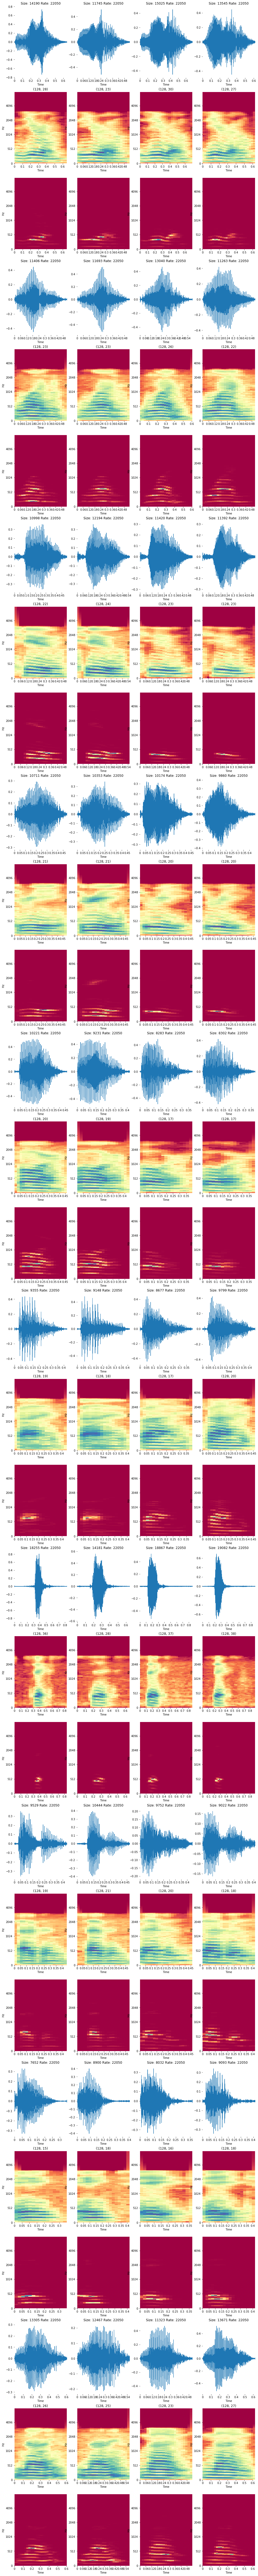

In [3]:
fig = plt.figure(figsize=[4,500]) 
#fig = plt.gcf()
number_of_colums = 4
fig.set_size_inches(number_of_colums*4, 175)

recordingsPath = os.getcwd() + '/recordings'
#fileList = os.listdir(recordingsPath)

for number in range(10):
    fileList = [fn for fn in os.listdir(recordingsPath)
              if fn.startswith(str(number))][:number_of_colums]
 
    for column in range(number_of_colums):        
        loadAndPlot (recordingsPath, fileList[column], number_of_colums, (number * number_of_colums * 3) + column)

fig.show()

#ipd.Audio(data=samples, rate=sample_rate)

In [86]:
recordingsPath = os.getcwd() + '/recordings'
#fileList = os.listdir(recordingsPath)

fileList = [fn for fn in os.listdir(recordingsPath)
          if fn.startswith('1')][:10]

samples, sample_rate = librosa.load(recordingsPath + '/' + fileList[0])    

S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)    
S_dB = librosa.power_to_db(S, ref=np.max)
#for index in range(len(S_dB)):
#    print(S_dB[index])
#S_dB.shape
S_dbscaled = np.mean(S_dB.T,axis=0)
S_dbscaled

array([-57.19093 , -45.27524 , -26.393326, -18.474134, -23.75906 ,
       -27.818714, -18.33212 ,  -9.466796, -15.309293, -28.211622,
       -24.53264 , -17.596224, -22.940355, -31.067253, -22.298029,
       -15.610524, -18.303373, -22.665262, -24.838438, -20.98731 ,
       -24.309189, -26.10283 , -27.258665, -23.554098, -22.595757,
       -26.161398, -28.456175, -27.120232, -26.36371 , -28.4886  ,
       -29.338926, -31.577854, -31.93927 , -32.464584, -34.929054,
       -32.998222, -32.718544, -36.390255, -34.001064, -35.591763,
       -36.00397 , -33.551266, -35.10343 , -39.111336, -42.89838 ,
       -46.274933, -46.73008 , -46.078217, -45.90683 , -45.354275,
       -47.333797, -48.06585 , -48.602943, -47.466015, -47.639908,
       -47.765747, -47.020035, -47.6644  , -46.624203, -47.447533,
       -46.978405, -47.645782, -49.32549 , -49.887882, -50.306927,
       -49.049347, -50.19004 , -51.54123 , -53.680286, -54.076305,
       -54.06706 , -53.61875 , -55.734596, -53.88865 , -54.438